## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Data

In [2]:
def fetch_data(filename):
	fetch_dir = os.path.join(os.getcwd(), 'data')
	data_path = os.path.join(fetch_dir, f"{filename}.parquet")
	return pd.read_parquet(data_path)

In [3]:
df = fetch_data('train')
df = df.astype({"rating": "int"})
df

,user_id,product_id,rating,timestamp
0,A32WYCA6H2OJ1P,B000UV4EUG,1,1221350400
1,A1Y789H45U75X,B004G6002M,5,1357862400
2,A2BVZA2KEVIWTV,B000MEDI3K,5,1233532800
3,A2TQBTE41AUBE5,B0000AW0QQ,4,1145491200
4,A2STRRWYP9CSCI,B000JV9NL2,5,1266796800
...,...,...,...,...
995,A5VOT37T997D5,B003L1ZYZ6,5,1393372800
996,A2EZJ0SHG540WJ,B007ZEQFG2,5,1382745600
997,A36ZYLI5JVHT3B,B000067VC4,4,1389744000
998,A3BVOSEDINAR86,B0029Z9UNC,4,1341273600


## Summary Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     1000 non-null   object
 1   product_id  1000 non-null   object
 2   rating      1000 non-null   int32 
 3   timestamp   1000 non-null   int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 27.5+ KB


In [5]:
df.shape

(1000, 4)

In [6]:
df.describe()

,rating,timestamp
count,1000.000000,1.000000e+03
mean,3.968000,1.340095e+09
std,1.425836,6.733169e+07
min,1.000000,9.821952e+08
25%,3.000000,1.318572e+09
50%,5.000000,1.363003e+09
75%,5.000000,1.386547e+09
max,5.000000,1.405901e+09


In [7]:
df.describe(include="O")

,user_id,product_id
count,1000,1000
unique,999,966
top,AESUSWRKMY5PE,B005HMKKH4
freq,2,3


In [8]:
df.isna().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

- Train data consists of `1000 records`
- Has 2 numeric columns and 2 categorical columns
- Based on summary statistics:
  - 25% observations have rating up to 3
  - 25% observations have rating from 3 to 5
  - 50% observations have rating of 5
  - The user `AESUSWRKMY5PE` has given the most no. of reviews (~ 500)
  - The product `B005HMKKH4` has received the most no. of reviews (~ 17000)
- There are `no missing values` in the training set

## Rating

In [9]:
(
	df.rating
	.value_counts()
	.pipe(lambda ser: pd.concat([ser, df.rating.value_counts(normalize=True)], axis=1))
	.sort_index()
	.set_axis(['freq', 'percentage'], axis=1)
)

,freq,percentage
1,138,0.138
2,44,0.044
3,72,0.072
4,204,0.204
5,542,0.542


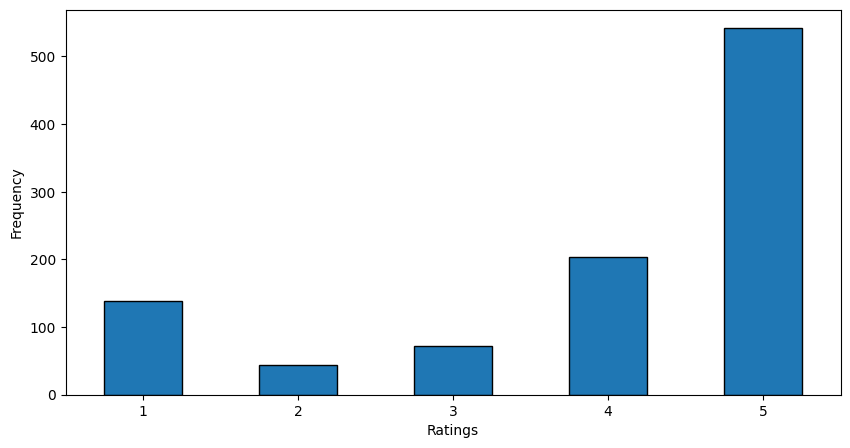

In [10]:
plt.figure(figsize=(10, 5))

(
	df.rating
	.value_counts()
	.sort_index()
	.plot(kind='bar', edgecolor='black')
)
plt.xlabel("Ratings")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

plt.show()

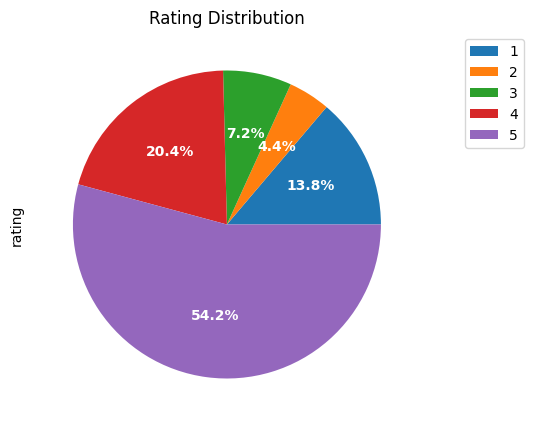

In [11]:
plt.figure(figsize=(10, 5))

(
	df.rating
	.value_counts()
	.sort_index()
	.plot(
		kind='pie',
		autopct='%1.1f%%',
		title='Rating Distribution',
		textprops=dict(color='white', weight='bold')
	)
)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()

- Almost `54%` ratings are of 5 stars
- Very few users have given 2 stars

## Top 10 Users who have given the most no. of Reviews

In [12]:
(
	df.user_id
	.value_counts()
	.sort_values(ascending=False)
	.head(10)
)

AESUSWRKMY5PE     2
A15V22SPW4UCKL    1
A1HQ7BG2VGUT03    1
A3MARHAZTWIG5R    1
A2BVZA2KEVIWTV    1
A2TQBTE41AUBE5    1
A2STRRWYP9CSCI    1
A2MI9M5AM37SR3    1
A1V4P6GGY728TV    1
ACBXWNU4CMHGL     1
Name: user_id, dtype: int64

## Top 10 Products that have been given the most no. of Reviews

In [13]:
(
	df.product_id
	.value_counts()
	.sort_values(ascending=False)
	.head(10)
)

B005HMKKH4    3
B0002L5R78    2
B008RXYOKY    2
B006GH8VI4    2
B006TT91TW    2
B00A7BGMSQ    2
B001S4OTS6    2
B004G6002M    2
B00BF9HZT4    2
B007XOQ3BQ    2
Name: product_id, dtype: int64

## Top 10 Products that have received the Highest Average Ratings

#### Criteria:
- The products should have been given more than 10 reviews to be considered

In [14]:
(
	df.product_id
	.value_counts()
	.rename('freq')
	.to_frame()
	.query("freq > 10")
	.join(df.set_index('product_id'))
	.reset_index(names='product_id')
	.groupby('product_id')['rating']
	.mean()
	.sort_values(ascending=False)
	.head(10)
)

Series([], Name: rating, dtype: float64)

- There are no such products due to dataset size constraints